In [1]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings
from sklearn.metrics import mean_squared_error as mse
warnings.simplefilter('ignore')
plt.style.use('dark_background')

In [2]:
data = pd.read_csv('Transformed_Housing_Data2.csv')

In [3]:
sampledata=pd.DataFrame()
sampledata['Sale_Price']=data['Sale_Price'].head(30)

In [4]:
sampledata['Flat_area']=data['Flat Area (in Sqft)'].head(30)
sampledata

,Sale_Price,Flat_area
0,221900.0,1180.0
1,538000.0,2570.0
2,180000.0,770.0
3,604000.0,1960.0
4,510000.0,1680.0
5,1129575.0,5420.0
6,257500.0,1715.0
7,291850.0,1060.0
8,229500.0,1780.0
9,323000.0,1890.0


In [5]:

def slope_error(slope,intercept,sampledata):
    sale=[]
    for i in range(len(sampledata.Flat_area)):
        tmp = sampledata.Flat_area[i]*slope + intercept
        sale.append(tmp)
    MSE = mse(sampledata.Sale_Price, sale)
    return MSE

In [6]:
slope = [i/10 for i in range(5000)]
x=[]
for i in slope:
    y=slope_error(slope=i,intercept=0,sampledata=sampledata)
    x.append(y)
x

[281372081125.0,
 281155753399.74164,
 280939518020.63336,
 280723374987.675,
 280507324300.86664,
 280291365960.2083,
 280075499965.7,
 279859726317.3417,
 279644045015.13336,
 279428456059.075,
 279212959449.1667,
 278997555185.4083,
 278782243267.8,
 278567023696.3417,
 278351896471.0333,
 278136861591.875,
 277921919058.86664,
 277707068872.00836,
 277492311031.3,
 277277645536.74164,
 277063072388.3333,
 276848591586.075,
 276634203129.9667,
 276419907020.00836,
 276205703256.2,
 275991591838.5417,
 275777572767.0333,
 275563646041.675,
 275349811662.4667,
 275136069629.4083,
 274922419942.5,
 274708862601.74167,
 274495397607.13333,
 274282024958.675,
 274068744656.36667,
 273855556700.20834,
 273642461090.2,
 273429457826.34167,
 273216546908.63333,
 273003728337.075,
 272791002111.66666,
 272578368232.40833,
 272365826699.3,
 272153377512.34167,
 271941020671.53333,
 271728756176.875,
 271516584028.36667,
 271304504226.00833,
 271092516769.8,
 270880621659.74167,
 270668818895.

([<matplotlib.lines.Line2D at 0x21f77f49d30>], 5000)

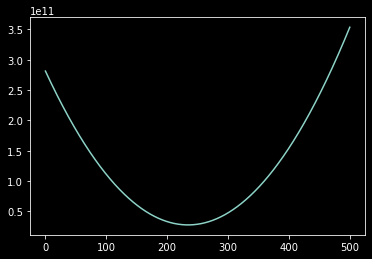

In [7]:
plt.plot(slope,x),len(slope)

In [8]:
costtable=pd.DataFrame({'slope':slope,'cost':x})
costtable.tail()

,slope,cost
4995,499.5,3.526038e+11
4996,499.6,3.528488e+11
4997,499.7,3.530938e+11
4998,499.8,3.533389e+11
4999,499.9,3.535842e+11


In [9]:
np.sqrt(7.003385e+16)

264639093.8618102

In [10]:
def par_inti(y):
    
    m=0.1
    c = y.mean()
    return m,c

In [18]:

def predictions(m,c,x):
    b=[]
    for x in x:
        y= m*x + c
        b.append(y)
    return b    

In [12]:
def cost_cal(b,y):
    cost = np.sum(((b-y)**2)/len(y))
    return cost

In [13]:
def gradient(m,c,x,y):
    n=len(y)
    gm = 2/n* np.sum((x*m + c - y)*x)
    
    gc = 2/n* np.sum((x*m + c - y))
    return gm,gc
    
    

In [14]:
def paraupdate(a,m_old,c_old,gm_old,gc_old):
    m_new = m_old - a*gm_old
    c_new = c_old - a*gc_old
    return m_new ,c_new

In [22]:
def result(m,c,x,y,cost,b,i):
    '''print and plot the final result of gradient descent'''
    if i < max_iter -1:
        print('gradient descent has converged at iteration{}'.format(i))
    else:
        print('result after  ',max_iter,'mmdsv')
    
    
    ##plotting the graph
    
    plt.figure(dpi=120,figsize=(14,7))
    plt.scatter(x,y,color='red',label='data points')
    
    label='final regression line: m={};c={}'.format(str(m),str(c))
    plt.plot(x,b,label=label)
    plt.xlabel('flat area')
    plt.ylabel('sale price')
    plt.title('final regression line')
    plt.legend()

In [16]:
'''defing and reshaping data'''
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()



saleprice = scaler.fit_transform(sampledata['Sale_Price'].values.reshape(-1,1))
flatarea = scaler.fit_transform(sampledata['Flat_area'].values.reshape(-1,1))

gsggrg
after iteration  0 m =, 0.11316346413633305 c = 1.1849780416165836e-16 cost =  0.85836535863667
after iteration  20 m =, 0.3275595607435688 c = 1.240489192847842e-16 cost =  0.6182472245590185
after iteration  40 m =, 0.4706921039517346 c = 1.3248661427193537e-16 cost =  0.5112264752046607
after iteration  60 m =, 0.5662485308150865 c = 1.415904430738617e-16 cost =  0.46352728398628984
after iteration  80 m =, 0.6300427631414932 c = 1.4951003398285442e-16 cost =  0.4422677351921283
after iteration  100 m =, 0.6726323011945988 c = 1.611303683072644e-16 cost =  0.4327923457067555
after iteration  120 m =, 0.7010654163122192 c = 1.666074685620818e-16 cost =  0.42856916078553225
after iteration  140 m =, 0.7200475906265729 c = 1.6660746856208182e-16 cost =  0.4266868855601835
after iteration  160 m =, 0.7327202415200801 c = 1.669405354694694e-16 cost =  0.42584795473189874
after iteration  180 m =, 0.7411806042798547 c = 1.6694053546946945e-16 cost =  0.42547404292284524
after itera

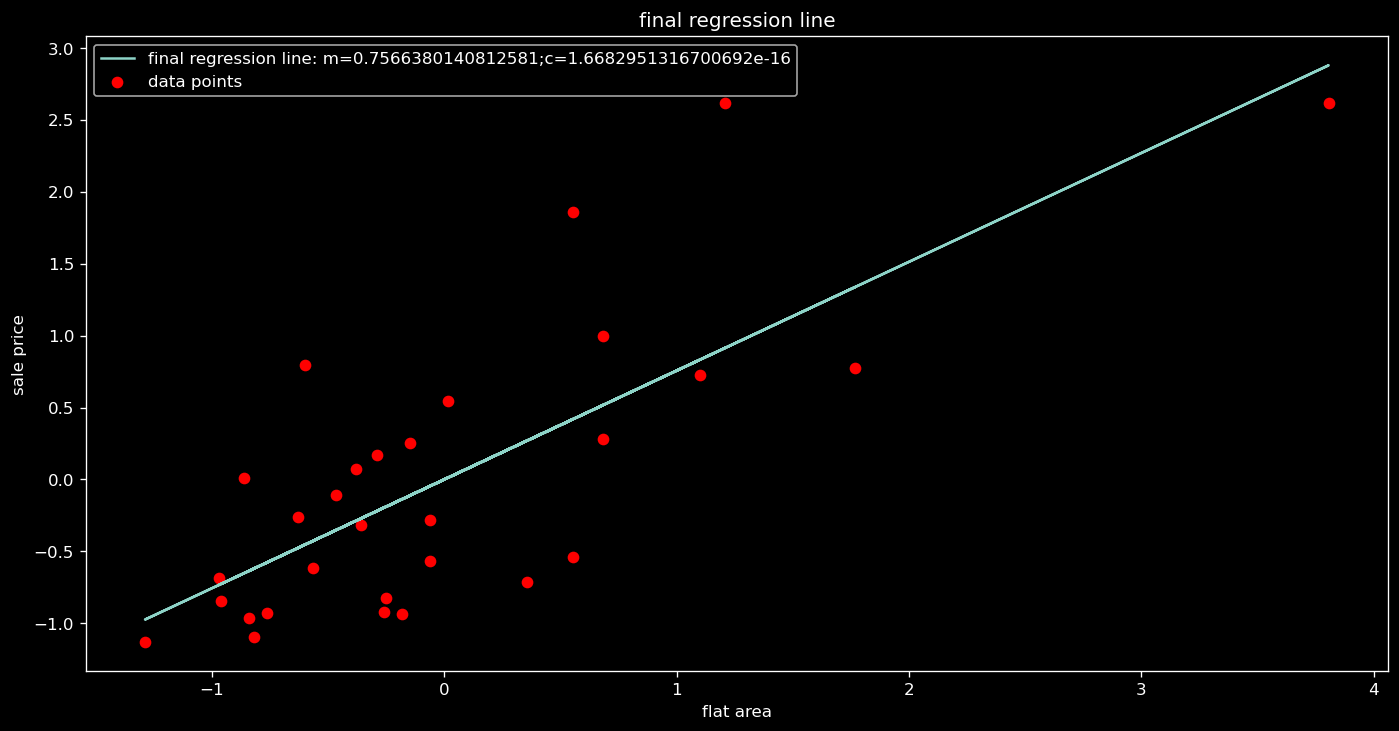

In [23]:

###declaring parameters
max_iter =1000
cost_old = 0
a = 0.01

### step :1 initializing the values of m ,c
m ,c = par_inti(saleprice)
print('gsggrg')
##gradienet descent in action
for i in range(0,max_iter):
    
    ##step:2 generating predictions 
    b1 = predictions(m,c,flatarea)
   
    ##step:3 calculating cost
    cost_new = cost_cal(b1,saleprice)
    
    ##step:4 checking if GD convergede
    if abs(cost_new-cost_old)<10**-7:
        
        break
    
    ###calculating gradients
    gm,gc = gradient(m,c,flatarea,saleprice)
    
    ##step:5 updating gradients
    m,c = paraupdate(a,m,c,gm,gc)
    
    
    ##display result after every 20 iterations
    
    if i%20==0:
        print('after iteration ',i,'m =,',m,'c =',c,'cost = ',cost_new)
    cost_old = cost_new
result(m,c,flatarea,saleprice,cost_new,b1,i)

In [ ]:
b.shape
